In [18]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [21]:
VENT_EASTING = 0
VENT_NORTHING = 0
VENT_ELEVATION = 1
PLUME_HEIGHT = 25000
ALPHA = 1.04487
BETA = 1.46425
ERUPTION_MASS = 1800000000000.0
MAX_GRAINSIZE = -4.5
MIN_GRAINSIZE = 4.5
MEDIAN_GRAINSIZE = 0
STD_GRAINSIZE = 1.8
EDDY_CONST = 0.04
DIFFUSION_COEFFICIENT = 1
FALL_TIME_THRESHOLD = 288
LITHIC_DENSITY = 2700.0
PUMICE_DENSITY = 1000.0
COL_STEPS = 75
PART_STEPS = 10
PLUME_MODEL = 2


df = pd.read_csv("mass_initialisation.csv")
display(df.head())

,gs_step,col_step,particle_ht,ashdiam,part_density,fall_time,plume_diffusion_fine_particle,plume_diffusion_coarse_particle,total_fall_time,wind_sum_x,wind_sum_y,actual_mass
0,0,0,334.32,0.022627,1000.0,14.157108,54.789974,355.527112,14.157108,0.0,141.571079,2.727191e+08
1,0,1,667.64,0.000000,0.0,13.872278,95.394886,1422.108447,28.029386,0.0,280.293856,2.795630e+08
2,0,2,1000.96,0.000000,0.0,13.593178,131.946569,3199.744005,41.622564,0.0,416.225635,2.828784e+08
3,0,3,1334.28,0.000000,0.0,13.319693,166.092143,5688.433787,54.942257,0.0,549.422570,2.846990e+08
4,0,4,1667.60,0.000000,0.0,13.051711,198.553296,8888.177792,67.993968,0.0,679.939684,2.856764e+08


In [22]:
print("Calculated Mass: %s"%str(df.actual_mass.sum()))
print("Input Mass: %s"%str(ERUPTION_MASS))
print("Proportion of Total Mass: %s"%str(df.actual_mass.sum()/ERUPTION_MASS))

Calculated Mass: 1800000000000.0
Input Mass: 1800000000000.0
Proportion of Total Mass: 1.0


In [23]:
agg_per_gs = df.groupby("gs_step").sum()
display(agg_per_gs)
mass_per_gs = agg_per_gs.actual_mass
agg_per_gs.ashdiam

,col_step,particle_ht,ashdiam,part_density,fall_time,plume_diffusion_fine_particle,plume_diffusion_coarse_particle,total_fall_time,wind_sum_x,wind_sum_y,actual_mass
gs_step,,,,,,,,,,,
0,2775,950037.0,0.022627,1000.00,550.426104,73061.537267,5.100036e+07,2.596674e+04,0.0,2.596674e+05,1.600304e+10
1,2775,950037.0,0.012126,1000.00,751.904216,73061.537267,5.100036e+07,3.547161e+04,0.0,3.547161e+05,4.929282e+10
2,2775,950037.0,0.006498,1000.00,1027.131429,73061.537267,5.100036e+07,4.845565e+04,0.0,4.845565e+05,1.182473e+11
3,2775,950037.0,0.003482,1000.00,1403.847200,73061.537267,5.100036e+07,6.619376e+04,0.0,6.619376e+05,2.209151e+11
4,2775,950037.0,0.001866,1021.25,2052.888258,73061.537267,5.100036e+07,9.262214e+04,0.0,9.262214e+05,3.214296e+11
5,2775,950037.0,0.001000,1212.50,3292.358471,73061.537267,5.100036e+07,1.456656e+05,0.0,1.456656e+06,3.642274e+11
6,2775,950037.0,0.000536,1403.75,5572.226522,73061.537267,5.100036e+07,2.465351e+05,0.0,2.465351e+06,3.214296e+11
7,2775,950037.0,0.000287,1595.00,9615.324665,73061.537267,5.100036e+07,4.227727e+05,0.0,4.227727e+06,2.209151e+11
8,2775,950037.0,0.000154,1786.25,20718.673361,73061.537267,5.100036e+07,8.134244e+05,0.0,8.134244e+06,1.182473e+11


gs_step
0    0.022627
1    0.012126
2    0.006498
3    0.003482
4    0.001866
5    0.001000
6    0.000536
7    0.000287
8    0.000154
9    0.000082
Name: ashdiam, dtype: float64

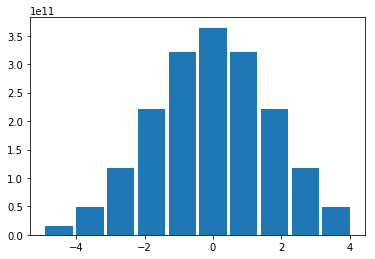

In [24]:
phi_left = -np.log2(agg_per_gs.ashdiam/.001)

plt.bar(phi_left, mass_per_gs.values)
plt.show()

,Index,Y,Prob,Cumulative
0,0,-4.5,0.008764,0.008764
1,1,-3.6,0.026995,0.035760
2,2,-2.7,0.064759,0.100518
3,3,-1.8,0.120985,0.221504
4,4,-0.9,0.176033,0.397537
5,5,-0.0,0.199471,0.597008
6,6,0.9,0.176033,0.773040
7,7,1.8,0.120985,0.894026
8,8,2.7,0.064759,0.958785
9,9,3.6,0.026995,0.985780


<Figure size 432x288 with 0 Axes>

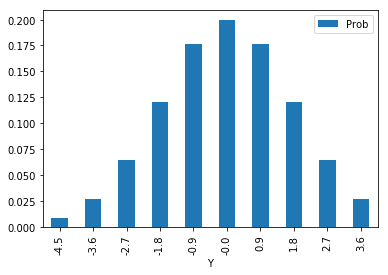

In [25]:
phi_df = pd.read_csv("grain_size_dist.out")
display(phi_df)
plt.figure()
phi_df.plot.bar(x='Y', y='Prob', color='C0')

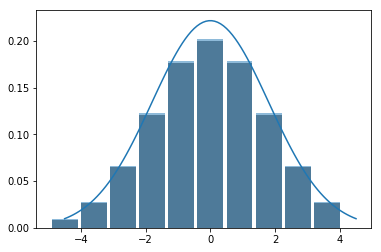

In [26]:
norm_mass_per_gs = mass_per_gs.values/mass_per_gs.values.sum()

x = np.linspace(-4.5,4.5, 100)
plt.bar(phi_df.Y, phi_df.Prob, color='k', alpha=0.5)
plt.bar(phi_left, norm_mass_per_gs, alpha=0.5)

plt.plot(x, stats.norm.pdf(x, MEDIAN_GRAINSIZE, STD_GRAINSIZE))

